[Home](../../README.md)

### Data Preprocessing

This Jupyter Notebook demonstrates different processes you can apply to your data to better understand it before data wrangling. For this demonstration we will use relatively a complex real dataset that compares health measures with the speed of progress of type 2 adult onset diabetes.

#### Load the required dependencies

Load the two required dependencies:

- [Numpy](https://numpy.org/doc/stable/) is a library that enables numerical computing with Python
- [Pandas](https://pandas.pydata.org/) is library for data analysis and manipulation.
- [Matplotlib](https://matplotlib.org) a comprehensive library for creating static, animated, and interactive visualizations in Python. A customised stylesheet for the visualisations is also applied.

In [41]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')

####  Store the data as a local variable

The data frame is a Pandas object that structures your tabular data into an appropriate format. It loads the complete data in memory so it is now ready for preprocessing.

In [42]:
data_frame = pd.read_csv("2.1.2.diabeties_sample_data.csv")

#### Data Snapshot

It is important to get a high-level look at your dataset to understand what you are working with. Printing the complete data might be impossible for large-scale datasets where the rows can be in thousands or even millions.

You can use the `head()` and `tail()` method call to inspect the first and last 5 rows of your dataset.

In [43]:
# Target = A measure of disease progression in one year
data_frame.head()

,DoB,DoT,SEX,BMI,BP,TC,BGU,FDR,Target
0,17/06/2001,9/10/2024,Female,18.0,78.0,4.00,92,2,94.0
1,10/06/1995,16/08/2024,Female,18.1,73.0,4.00,78,1,104.0
2,11/03/1981,8/03/2024,Male,18.5,87.0,2.67,80,2,90.0
3,15/05/2002,6/05/2024,Male,18.6,97.0,2.00,83,2,101.0
4,21/06/2001,20/07/2024,Male,18.8,78.0,2.00,86,2,85.0


####  Data Summary
 
The `info()` method call prints a summary of each column, giving you more information about the specific data types, total number of rows, null values and memory usage.

In [44]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DoB     448 non-null    object 
 1   DoT     448 non-null    object 
 2   SEX     447 non-null    object 
 3   BMI     448 non-null    float64
 4   BP      448 non-null    float64
 5   TC      448 non-null    float64
 6   BGU     448 non-null    int64  
 7   FDR     448 non-null    int64  
 8   Target  447 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 31.6+ KB


#### Statistics For Numerical Columns
 
The `describe()` method call provides basic statistical knowledge like the mean and spread of the data.

In [45]:
data_frame.describe()

,BMI,BP,TC,BGU,FDR,Target
count,448.000000,448.000000,448.000000,448.000000,448.000000,447.000000
mean,26.328125,94.657701,4.073884,91.234375,1.066964,151.221477
std,4.418662,14.169076,1.286538,11.453865,0.832762,77.479132
min,18.000000,51.000000,2.000000,58.000000,0.000000,25.000000
25%,23.100000,84.000000,3.000000,83.000000,0.000000,85.000000
50%,25.700000,93.000000,4.000000,91.000000,1.000000,139.000000
75%,29.200000,105.000000,5.000000,98.000000,2.000000,211.000000
max,42.200000,141.000000,9.090000,124.000000,3.000000,346.000000


#### The data columns are:

| Column | Data |
| ------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| DoB    | The patients Date of Birth recorded as D/MM/YYYY |
| DoT    | The patients date of testing records as D/MM/YYYY |
| SEX    | Patients gender --- |
| BMI    | Patients body mass index, which gives an indication of the patients body size and is calculated using their weight and height --- |
| BP     | Diastole blood pressure, which is the pressure of blood on the walls of the patient's arteries when their heart is relaxed. <80 is desirable, 80-95 is high >95 is very high. |
| TC     | Total cholesterol is a measure of the cholesterol in the patient's body. Cholesterol is essential in order for your body to continue building healthy cells; however, having high cholesterol can increase your risk of heart disease. <5.5 is desirable 5.5-6.6 is borderline, and >6.5 is undesirable |
| BGU    | Patients fasting blood glucose levels. 75-99 is desirable, and 100+ is undesirable. |
| FDR    | The number of family members in the individual's direct bloodline who have developed type 2 adult-onset diabetes. |
| Target | A quantitative measure of disease progression one year after baseline. Patients should aim towards `0` as this means the condition has not progressed further. |

#### Graphically present the data

At this early stage you are just wanting to evaluate the data, the below simple plots lets you look the data in different ways to inform your model design and data wrangling approaches.

<Axes: >

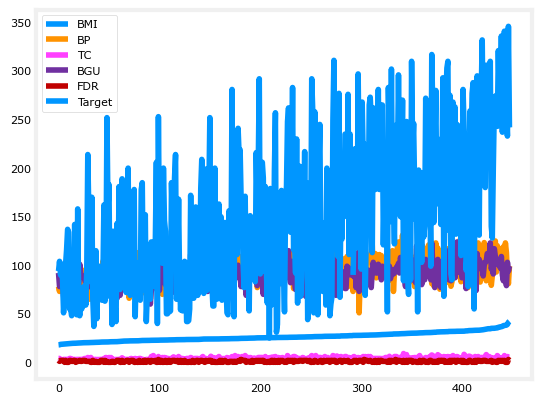

In [46]:
# plot a line graph 
data_frame.plot()

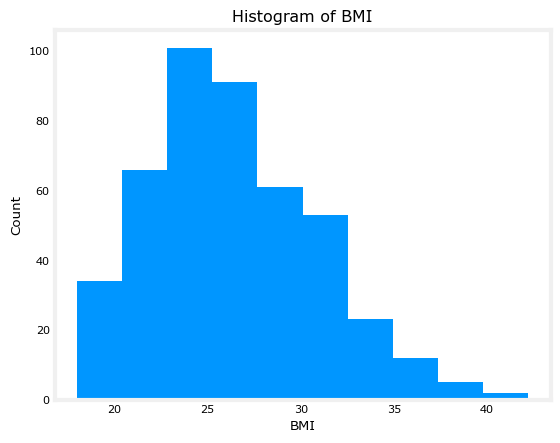

In [47]:
# Plot a histogram of a column
plt.hist(data_frame['BMI'])
plt.title(f"Histogram of {data_frame['BMI'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame["BMI"].name}')
plt.show()

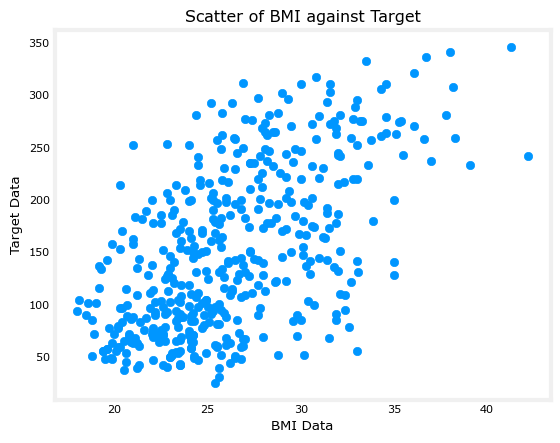

In [48]:
# Scatter plot 2 columns to see the relationship
plt.scatter(data_frame['BMI'], data_frame['Target'])
plt.title(f"Scatter of {data_frame['BMI'].name} against {data_frame['Target'].name}")
plt.ylabel(f'{data_frame['Target'].name} Data')
plt.xlabel(f'{data_frame['BMI'].name} Data')
plt.show()

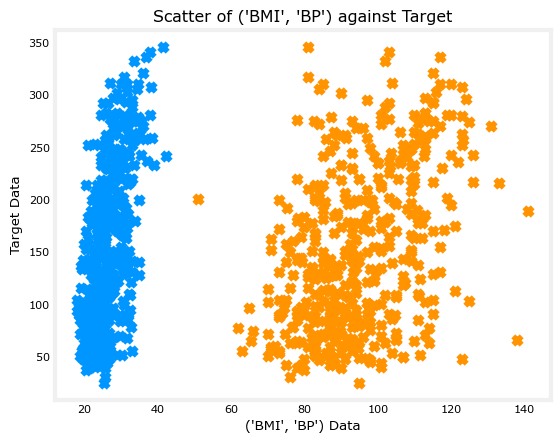

In [49]:
# Scatter plot multiples columns to see the relationship
x_plot = ['BMI', 'BP']
for col in x_plot:
    plt.scatter(data_frame[col], data_frame['Target'], marker='x')
plt.title(f"Scatter of {*x_plot,} against {data_frame['Target'].name}")
plt.ylabel(f'{data_frame['Target'].name} Data')
plt.xlabel(f'{*x_plot,} Data')
plt.show()

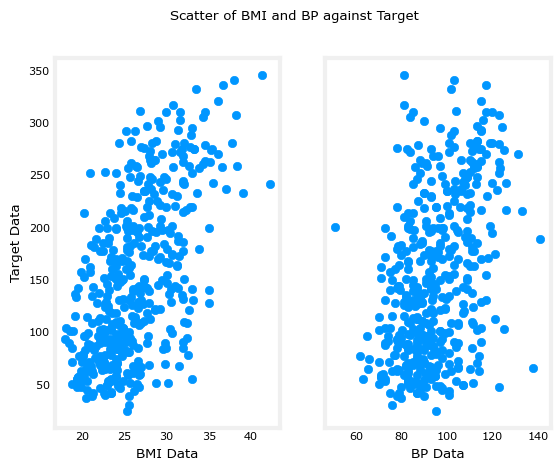

In [50]:
# Scatter plot 2 columns in separate charts with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
plt.suptitle(f"Scatter of {data_frame['BMI'].name} and {data_frame['BP'].name} against {data_frame['Target'].name}")
ax1.set_ylabel(f'{data_frame['Target'].name} Data')

ax1.scatter(data_frame['BMI'], data_frame['Target'])
ax1.set_xlabel(f'{data_frame['BMI'].name} Data')

ax2.scatter(data_frame['BP'], data_frame['Target'])
ax2.set_xlabel(f'{data_frame['BP'].name} Data')

plt.show()

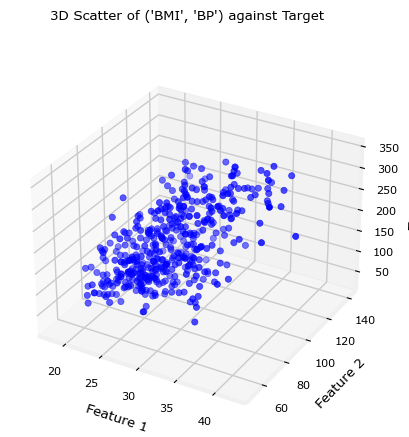

In [51]:
# 3D Scatter plot 3 columns to see the relationship

x_plot = ['BMI', 'BP']

fig = plt.figure()
plt.suptitle(f"3D Scatter of {*x_plot,} against {data_frame['Target'].name}")
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_frame[x_plot[0]], data_frame[x_plot[1]], data_frame['Target'], color='blue')

x1_range = np.linspace(data_frame[x_plot[0]].min(), data_frame[x_plot[0]].max())
x2_range = np.linspace(data_frame[x_plot[1]].min(), data_frame[x_plot[1]].max())
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)


ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.show()